# Perceptron

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

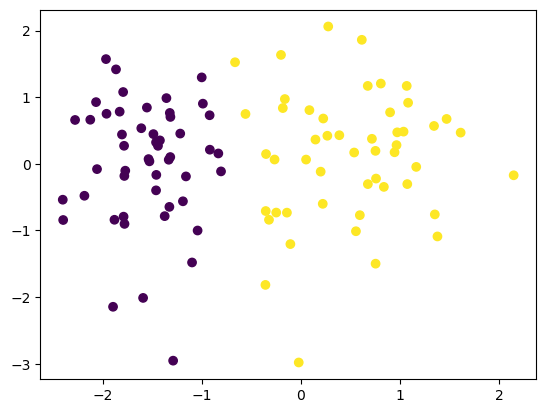

In [3]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [4]:
# First using perceptron:

In [5]:
def perceptron(X,y):
    epochs = 1000
    lr = 0.1
    X = np.insert(X,0,1,axis=1)
    w = np.ones(X.shape[1])

    for i in range(epochs):
        k = np.random.randint(0,100)
        y_hat = step(np.dot(X[k],w))
        w = w + lr * (y[k] - y_hat) * X[k]

    return w[0],w[1:]

In [6]:
def step(z):
    return 1 if z > 0 else 0

In [7]:
intercept_,coef_ = perceptron(X,y)

In [8]:
print(intercept_)
print(coef_)

0.9
[1.4199004  0.10953123]


In [9]:
# y = -(A/B)x-(C/B)

m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [10]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

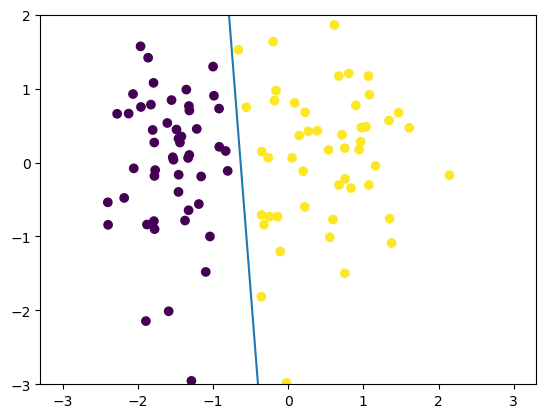

In [11]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.plot(x_input,y_input)
plt.ylim(-3,2)
plt.show()

In [12]:
# Now compare with logistic regression

In [13]:
lg = LogisticRegression()

In [14]:
lg.fit(X,y)

LogisticRegression()

In [15]:
m1 = -(lg.coef_[0][0]/lg.coef_[0][1])
b1 = -(lg.intercept_[0]/lg.coef_[0][1])

In [16]:
x1_input = np.linspace(-3,3,100)
y1_input = m1*x1_input + b1

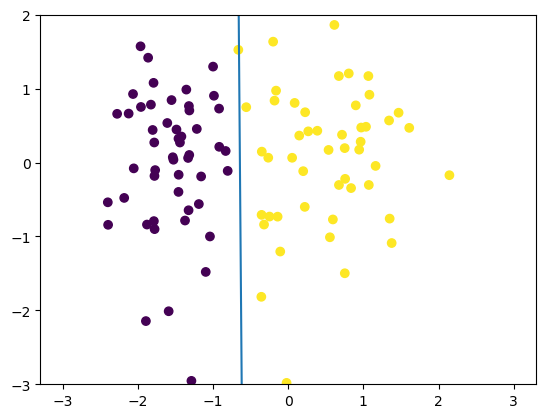

In [17]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.plot(x1_input,y1_input)
plt.ylim(-3,2)
plt.show()

In [18]:
# combined plot

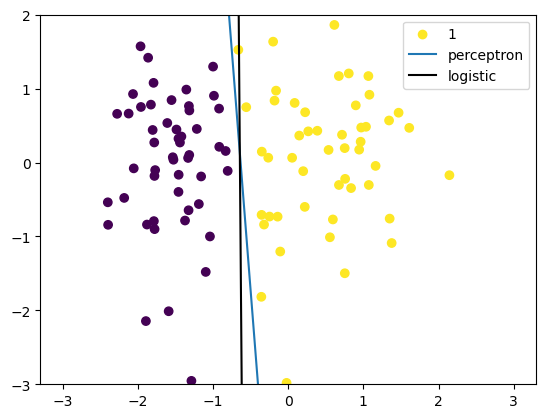

In [19]:
plt.scatter(X[:,0],X[:,1],c=y,label='1')
plt.plot(x_input,y_input,label='perceptron')
plt.plot(x1_input,y1_input,color='black',label='logistic')
plt.legend()
plt.ylim(-3,2)
plt.show()